# Credit Card Fraud Detection

In [2]:
# import necessary libraries 
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
from scipy import stats
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder


## Obtain & Load Data

In [3]:

# Read in the data with read_csv() into a Pandas Dataframe
customer_df=pd.read_csv("data/customer.csv")
terminal_df=pd.read_csv("data/terminal.csv")
train_df=pd.read_csv("data/train.csv")
test_df=pd.read_csv("data/test.csv")


## Exploratory data analysis

In [4]:
# To visualize the columns names
customer_df.columns

Index(['CUSTOMER_ID', 'x_customer_id', 'y_customer_id', 'mean_amount',
       'std_amount', 'mean_nb_tx_per_day', 'available_terminals',
       'nb_terminals'],
      dtype='object')

In [5]:
# Using .head() function to view the first rows/records of the "customer" dataset 
customer_df.head()

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[29, 87, 144, 241, 330, 858, 996, 1028, 1067, ...",22
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[5, 160, 242, 378, 431, 475, 571, 762, 876, 93...",20
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[316, 406, 447, 523, 968, 1200, 1318, 1365, 16...",10
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[65, 94, 113, 364, 401, 433, 485, 651, 672, 77...",17
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[372, 614, 774, 1362, 1446, 1564, 1637, 1939]",8


In [6]:
# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUSTOMER_ID          1000 non-null   int64  
 1   x_customer_id        1000 non-null   float64
 2   y_customer_id        1000 non-null   float64
 3   mean_amount          1000 non-null   float64
 4   std_amount           1000 non-null   float64
 5   mean_nb_tx_per_day   1000 non-null   float64
 6   available_terminals  1000 non-null   object 
 7   nb_terminals         1000 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 62.6+ KB


In [7]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
customer_df.describe(include='all')

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,975,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,"[20, 56, 266, 568, 682, 783, 794, 1010, 1130, ...",NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
mean,499.500000,51.318204,50.397990,51.550697,25.775348,1.956983,NaN,15.117000
std,288.819436,28.893939,28.785699,28.025746,14.012873,1.165512,NaN,4.255987
min,0.000000,0.007245,0.036734,5.063101,2.531550,0.000295,NaN,2.000000
25%,249.750000,27.099437,26.737835,27.596718,13.798359,0.931062,NaN,12.000000
50%,499.500000,50.601090,49.109879,51.596026,25.798013,1.886714,NaN,15.000000
75%,749.250000,76.422770,76.377724,75.304416,37.652208,2.994755,NaN,18.000000


In [8]:
# Verify which features have missing values
customer_df.isnull().sum()

CUSTOMER_ID            0
x_customer_id          0
y_customer_id          0
mean_amount            0
std_amount             0
mean_nb_tx_per_day     0
available_terminals    0
nb_terminals           0
dtype: int64

In [9]:
# Validating there is not duplicated values
total_duplicates_customer = customer_df.duplicated().sum()
print("Total Duplicates:", total_duplicates_customer)

Total Duplicates: 0


In [10]:
# Using .head() function to view the first rows/records of the "terminal" dataset 
terminal_df.head()

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,41.702200,72.032449
1,1,0.011437,30.233257
2,2,14.675589,9.233859
3,3,18.626021,34.556073
4,4,39.676747,53.881673


In [11]:
# To visualize the columns names
terminal_df.columns

Index(['TERMINAL_ID', 'x_terminal_id', 'y_terminal_id'], dtype='object')

In [12]:
# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
terminal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TERMINAL_ID    2000 non-null   int64  
 1   x_terminal_id  2000 non-null   float64
 2   y_terminal_id  2000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [13]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
terminal_df.describe(include='all')

,TERMINAL_ID,x_terminal_id,y_terminal_id
count,2000.000000,2000.000000,2000.000000
mean,999.500000,49.639290,50.635476
std,577.494589,28.807532,28.817640
min,0.000000,0.011437,0.009695
25%,499.750000,24.795839,25.443403
50%,999.500000,50.340815,51.212018
75%,1499.250000,74.303857,75.550561
max,1999.000000,99.859909,99.987579


In [14]:
# Verify which features have missing values
terminal_df.isnull().sum()

TERMINAL_ID      0
x_terminal_id    0
y_terminal_id    0
dtype: int64

In [15]:
# Validating there is not duplicated values
total_duplicates_terminal = customer_df.duplicated().sum()
print("Total Duplicates:", total_duplicates_terminal)

Total Duplicates: 0


In [16]:
# Using .head() function to view the first rows/records of the "train" dataset 
train_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
0,59383,2021-08-01 00:04:37,323,217,4.60,0
1,59384,2021-08-01 00:12:10,6,429,8.61,0
2,59385,2021-08-01 00:12:34,714,1011,64.00,0
3,59386,2021-08-01 00:15:40,266,1969,12.72,0
4,59387,2021-08-01 00:16:01,890,1482,98.88,0


In [17]:
# To visualize the columns names
train_df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_FRAUD'],
      dtype='object')

In [18]:
# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291231 entries, 0 to 291230
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TRANSACTION_ID  291231 non-null  int64  
 1   TX_DATETIME     291231 non-null  object 
 2   CUSTOMER_ID     291231 non-null  int64  
 3   TERMINAL_ID     291231 non-null  int64  
 4   TX_AMOUNT       291231 non-null  float64
 5   TX_FRAUD        291231 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 13.3+ MB


In [19]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
train_df.describe(include='all')

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
count,291231.000000,291231,291231.000000,291231.000000,291231.000000,291231.000000
unique,NaN,287096,NaN,NaN,NaN,NaN
top,NaN,2021-09-05 10:33:59,NaN,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,NaN,NaN
mean,204998.000000,NaN,496.256202,993.718526,53.182274,0.022601
std,84071.292461,NaN,285.274966,575.267551,39.573329,0.148627
min,59383.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,132190.500000,NaN,249.000000,496.000000,21.130000,0.000000
50%,204998.000000,NaN,498.000000,1000.000000,44.770000,0.000000
75%,277805.500000,NaN,741.000000,1483.000000,76.850000,0.000000


In [20]:
# Verify which features have missing values
train_df.isnull().sum()

TRANSACTION_ID    0
TX_DATETIME       0
CUSTOMER_ID       0
TERMINAL_ID       0
TX_AMOUNT         0
TX_FRAUD          0
dtype: int64

In [21]:
# Validating there is not duplicated values
total_duplicates = train_df.duplicated().sum()
print("Total Duplicates:", total_duplicates)

Total Duplicates: 0


In [22]:
# Using .head() function to view the first rows/records of the "test" dataset 
test_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT
0,352590,2022-01-01 00:03:14,208,640,147.24
1,352591,2022-01-01 00:26:39,851,315,13.27
2,352592,2022-01-01 00:30:30,454,27,70.52
3,352593,2022-01-01 00:31:31,677,1573,44.75
4,352594,2022-01-01 00:56:18,322,1398,37.60


In [23]:
# To visualize the columns names
test_df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT'],
      dtype='object')

In [24]:
# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226731 entries, 0 to 226730
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TRANSACTION_ID  226731 non-null  int64  
 1   TX_DATETIME     226731 non-null  object 
 2   CUSTOMER_ID     226731 non-null  int64  
 3   TERMINAL_ID     226731 non-null  int64  
 4   TX_AMOUNT       226731 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 8.6+ MB


In [25]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
test_df.describe(include='all')

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT
count,226731.000000,226731,226731.000000,226731.000000,226731.000000
unique,NaN,223535,NaN,NaN,NaN
top,NaN,2022-01-27 16:46:20,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,NaN
mean,465955.000000,NaN,496.092255,995.198129,53.229134
std,65451.746279,NaN,285.117396,575.763159,39.569785
min,352590.000000,NaN,0.000000,0.000000,0.000000
25%,409272.500000,NaN,249.000000,495.000000,21.210000
50%,465955.000000,NaN,498.000000,1002.000000,44.830000
75%,522637.500000,NaN,740.000000,1487.000000,76.850000


In [26]:
# Verify which features have missing values
test_df.isnull().sum()

TRANSACTION_ID    0
TX_DATETIME       0
CUSTOMER_ID       0
TERMINAL_ID       0
TX_AMOUNT         0
dtype: int64

In [27]:
# Validating there is not duplicated values
total_duplicates_test = test_df.duplicated().sum()
print("Total Duplicates:", total_duplicates_test)

Total Duplicates: 0


## Use visualizations to understand the relationship of the target variable with other features

In [28]:

# Change to catgorical column
train_df['TX_FRAUD'] = train_df['TX_FRAUD'].astype(str)

#Obtain the value counts and print them. We reset the index to make this a bit easier to plot.
fraud_v_counts = train_df['TX_FRAUD'].value_counts().reset_index()
#Rename the columns of this (now) df. 
fraud_v_counts.columns = ['Fraud', 'Value_Count']
#Recode the type, again, for plotting. Here, I will just rename the column values as well.
col_values = ['Not Fraud', 'Is Fraud']
fraud_v_counts['Fraud'] = col_values

print(f"Number of Fraud: {fraud_v_counts['Value_Count'][1]}\nNumber of NOT Fraud: {fraud_v_counts['Value_Count'][0]}")
print(f"The ratio between the two is: " \
f"{fraud_v_counts['Value_Count'][1]/(fraud_v_counts['Value_Count'][1]+fraud_v_counts['Value_Count'][0])} Fraud, " \
f"{fraud_v_counts['Value_Count'][0]/(fraud_v_counts['Value_Count'][1]+fraud_v_counts['Value_Count'][0])} Not Fraud")

Number of Fraud: 6582
Number of NOT Fraud: 284649
The ratio between the two is: 0.022600616005851025 Fraud, 0.9773993839941489 Not Fraud


In [29]:
# Plot the distribution of the target variable (TX_FRAUD) using a histogram

# Utilizing value counts for the categorical column
fig = px.bar(fraud_v_counts, x='Fraud', y='Value_Count', title="Value Counts of Target Variable 'fraud'",
            color='Fraud', color_discrete_map={
                'Not Fraud': '#300085',
                'Is Fraud': '#87CEEB'
            })

# Set the title, font, and axis names
fig.update_layout(
    title_x=0.5,  #Center the title
    font=dict(family="Gill Sans MT", color="black",size=24),
    xaxis_title="",
    yaxis_title="Frequency",
    showlegend=False,
    width = 800,
    height=500
)

# Set x-axis tick values
fig.update_xaxes(tickvals=[0, 1], ticktext=['Not Fraud', 'Is Fraud'])
fig.update_traces(marker_line_color='Blue', marker_line_width=2.33)
fig.show()

We can see that the classes are unbalanced. Showing a significatively difference between the amount of records for Not fraud than Is Fraud.

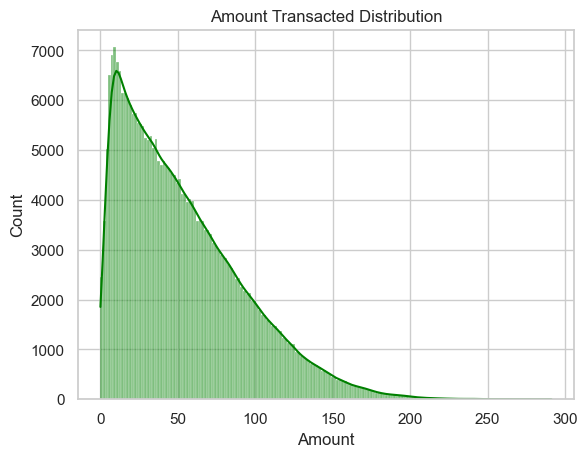

In [30]:
plt.figure()
sns.histplot(data=train_df, x='TX_AMOUNT', kde=True, color='Green')
plt.title('Amount Transacted Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

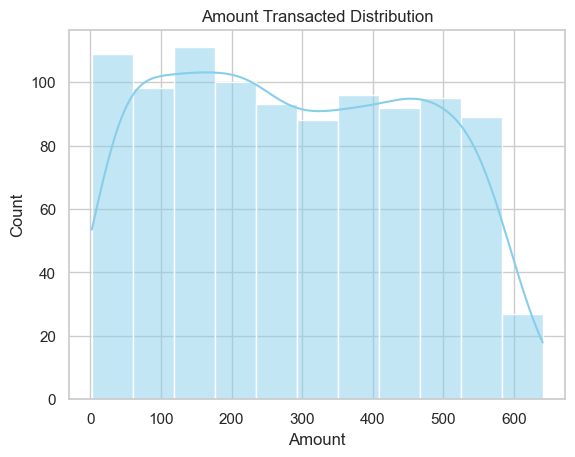

In [31]:
plt.figure()

# Group the DataFrame by the Customer_ID column and count occurrences
transaction_counts = train_df.groupby('CUSTOMER_ID').size()
sns.histplot(data=train_df, x=transaction_counts, kde=True, color='skyblue')
plt.title('Amount Transacted Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

## Prepare & Preprocess Data

In [32]:
# Merge train dataset with customer and terminal datasets to include customer and terminal information relevant to each transaction 
df = pd.merge(train_df, customer_df, on='CUSTOMER_ID', how='left')
df = df.merge(terminal_df, on='TERMINAL_ID', how='left')

## Feature Enginering

Create features that capture the behavior of transactions, customers, and terminals

In [33]:
# Calculate the distance between customer and terminal
df['distance'] = np.sqrt((df['x_customer_id'] - df['x_terminal_id'])**2 + (df['y_customer_id'] - df['y_terminal_id'])**2)

# Calculate the deviation of transaction amount from the customer's mean amount
df['amount_deviation'] = np.abs(df['TX_AMOUNT'] - df['mean_amount'])

In [34]:
# remove x_customer_id, y_customer_id, x_terminal_id, y_terminal_id
df = df.drop('x_customer_id', axis=1)
df = df.drop('y_customer_id', axis=1)
df = df.drop('x_terminal_id', axis=1)
df = df.drop('y_terminal_id', axis=1)


In [35]:
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])  # Convert to datetime
df['month'] = df['TX_DATETIME'].dt.month
df['day'] = df['TX_DATETIME'].dt.day
df['hour'] = df['TX_DATETIME'].dt.hour

In [36]:
df.drop("TX_DATETIME", axis=1, inplace= True)

Here we assign a value of 0 if the terminal where the transaction was done is in the list of available terminals. Otherwise it assigns a value of 1.

In [37]:
import ast

df['available_terminals'] = df['available_terminals'].apply(ast.literal_eval)

df['TX_Terminal'] = df.apply(lambda row: 0 if row['TERMINAL_ID'] in row['available_terminals'] else 1, axis=1)


We see that all the terminal ID's are in the list so we drop the column.

In [38]:
df.drop("TX_Terminal", inplace= True, axis=1)
df.drop("available_terminals", inplace= True, axis=1)
df.drop( "TRANSACTION_ID", inplace= True, axis=1)

Here we see that the column TX_FRAUD is an object type, but given that it only can takes values 0 or 1 we are going to convert it to integer.

In [39]:
df.dtypes

CUSTOMER_ID             int64
TERMINAL_ID             int64
TX_AMOUNT             float64
TX_FRAUD               object
mean_amount           float64
std_amount            float64
mean_nb_tx_per_day    float64
nb_terminals            int64
distance              float64
amount_deviation      float64
month                   int32
day                     int32
hour                    int32
dtype: object

In [40]:
df["TX_FRAUD"] = df["TX_FRAUD"].astype(int)
df.dtypes

CUSTOMER_ID             int64
TERMINAL_ID             int64
TX_AMOUNT             float64
TX_FRAUD                int32
mean_amount           float64
std_amount            float64
mean_nb_tx_per_day    float64
nb_terminals            int64
distance              float64
amount_deviation      float64
month                   int32
day                     int32
hour                    int32
dtype: object

In [41]:
df['TX_FRAUD'].value_counts()

TX_FRAUD
0    284649
1      6582
Name: count, dtype: int64

Text(0.5, 0, 'Fraud Detection')

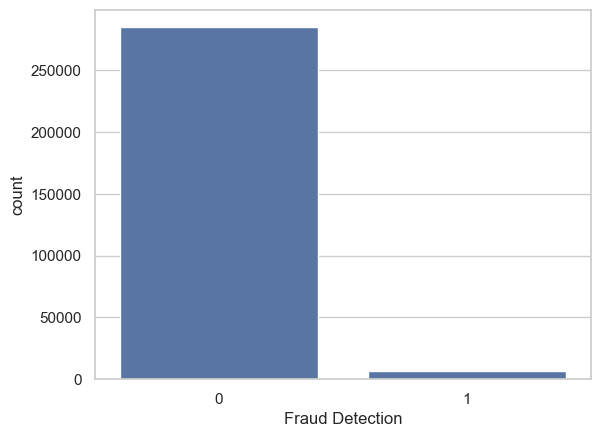

In [42]:
plt.figure()
sns.countplot(df, x="TX_FRAUD")
plt.xlabel('Fraud Detection')

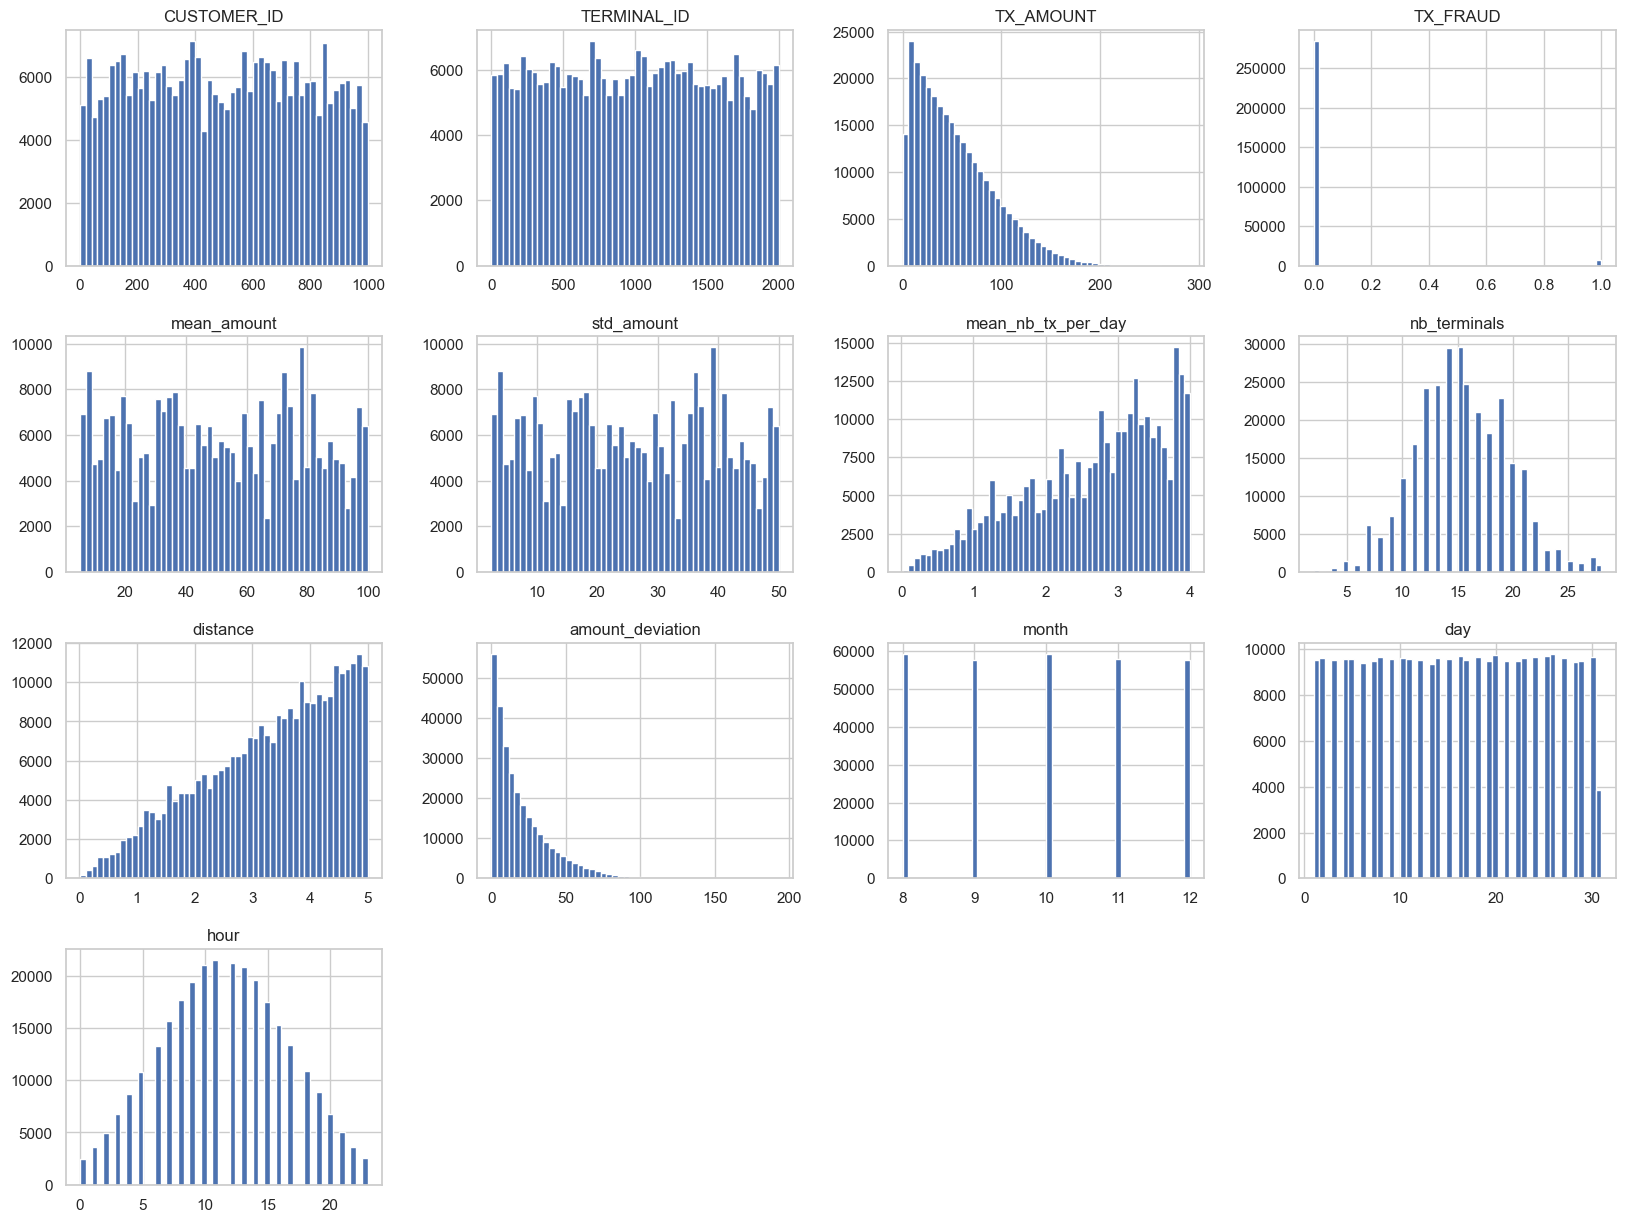

In [43]:
df.hist(bins=50, figsize=(20,15))
plt.show()

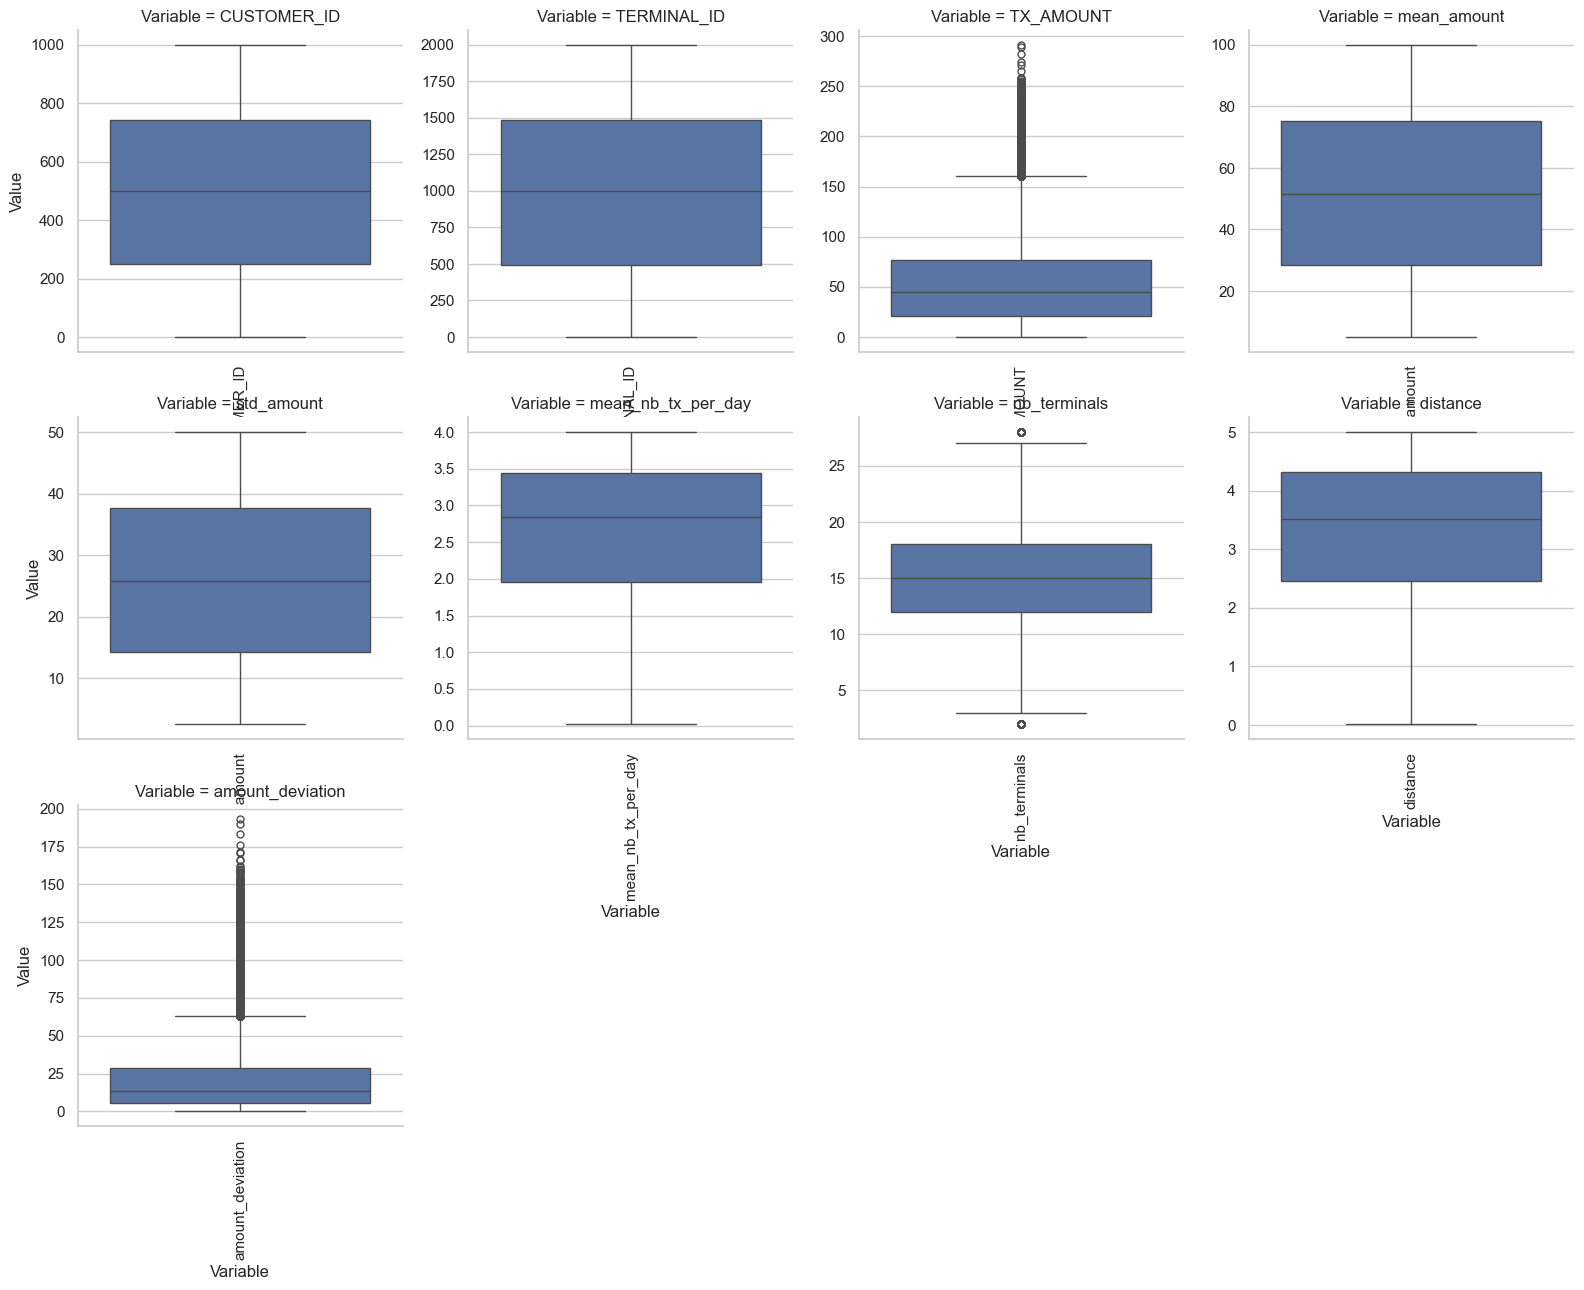

In [44]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
melted_df = pd.melt(df[numeric_cols], var_name='Variable', value_name='Value')

g = sns.catplot(x='Variable', y='Value', col='Variable',
                data=melted_df, kind='box',
                col_wrap=4, 
                sharex=False, sharey=False,
                height=4, aspect=1)

g.set_xticklabels(rotation=90)
plt.show()

In [45]:
column_name = 'TX_AMOUNT'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define outliers as those below (Q1 - 1.5*IQR) or above (Q3 + 1.5*IQR)
TX_AMOUNT_outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))]

# Count of outliers
outlier_count = TX_AMOUNT_outliers.shape[0]

print(f"Number of outliers in {column_name}: {outlier_count}")

Number of outliers in TX_AMOUNT: 4117


In [46]:
column_name = 'amount_deviation'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define outliers as those below (Q1 - 1.5*IQR) or above (Q3 + 1.5*IQR)
amount_deviation_outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))]

# Count of outliers
outlier_count = amount_deviation_outliers.shape[0]

print(f"Number of outliers in {column_name}: {outlier_count}")

Number of outliers in amount_deviation: 11921


In [47]:
index_to_remove = TX_AMOUNT_outliers.index.union(amount_deviation_outliers.index)

In [48]:
df.drop(index_to_remove, inplace=True)

In [49]:
df['TX_FRAUD'].value_counts()

TX_FRAUD
0    273088
1      6169
Name: count, dtype: int64

We can also create a feature with the difference between the transaction value and the mean amount:

In [50]:
df["transation_mean_difference"] = df["TX_AMOUNT"] - df["mean_amount"]

Sotre a version of the dataframe until now:

In [51]:
df_pre_standarization = df.copy()

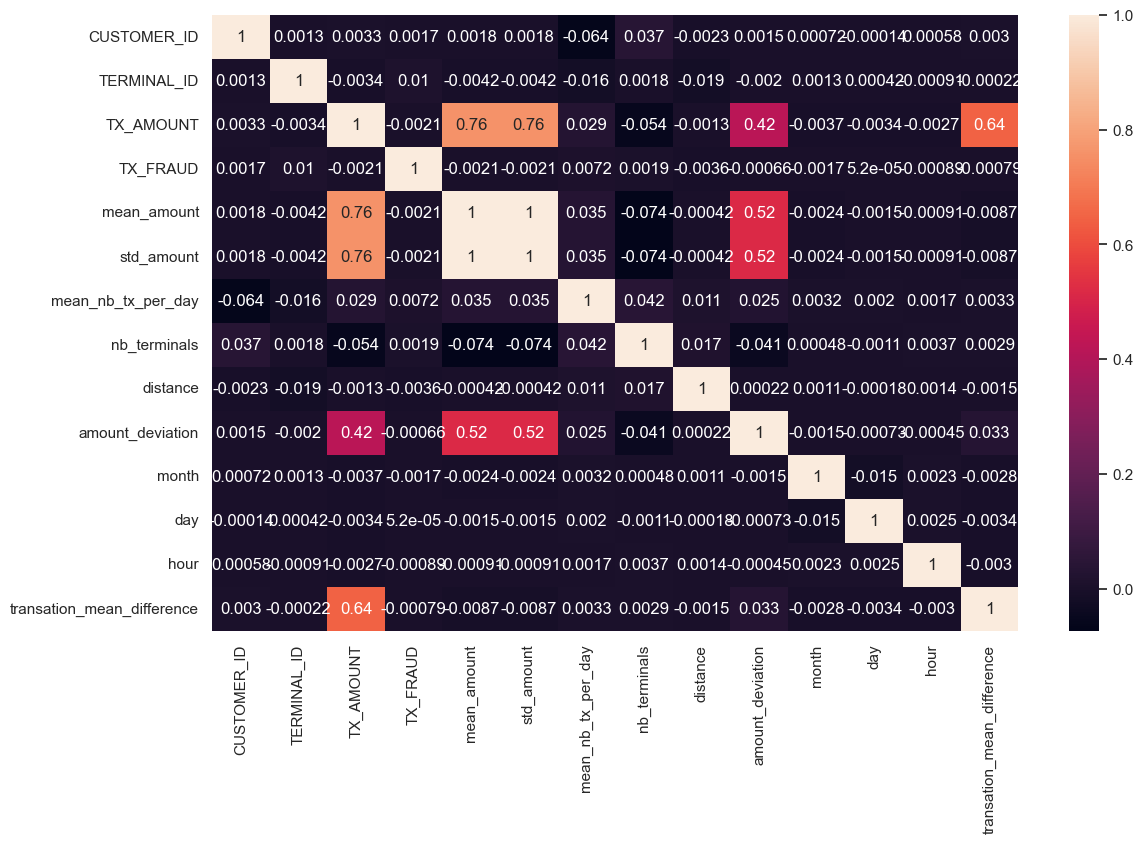

In [52]:
# Plot a graphical correlation matrix for each pair of columns in the dataframe
corr = df.corr() # data frame correlation function

# make the heatmap larger in size
plt.figure(figsize = (13,8))

sns.heatmap(corr, annot=True)
plt.show()

We see that the feature "std_amount" has a high correlation with three different features, so we are droping it.

In [53]:
df.drop("std_amount", axis=1, inplace= True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279257 entries, 0 to 291230
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CUSTOMER_ID                 279257 non-null  int64  
 1   TERMINAL_ID                 279257 non-null  int64  
 2   TX_AMOUNT                   279257 non-null  float64
 3   TX_FRAUD                    279257 non-null  int32  
 4   mean_amount                 279257 non-null  float64
 5   mean_nb_tx_per_day          279257 non-null  float64
 6   nb_terminals                279257 non-null  int64  
 7   distance                    279257 non-null  float64
 8   amount_deviation            279257 non-null  float64
 9   month                       279257 non-null  int32  
 10  day                         279257 non-null  int32  
 11  hour                        279257 non-null  int32  
 12  transation_mean_difference  279257 non-null  float64
dtypes: float64(6), int3

##### Heatmap after removing correlation

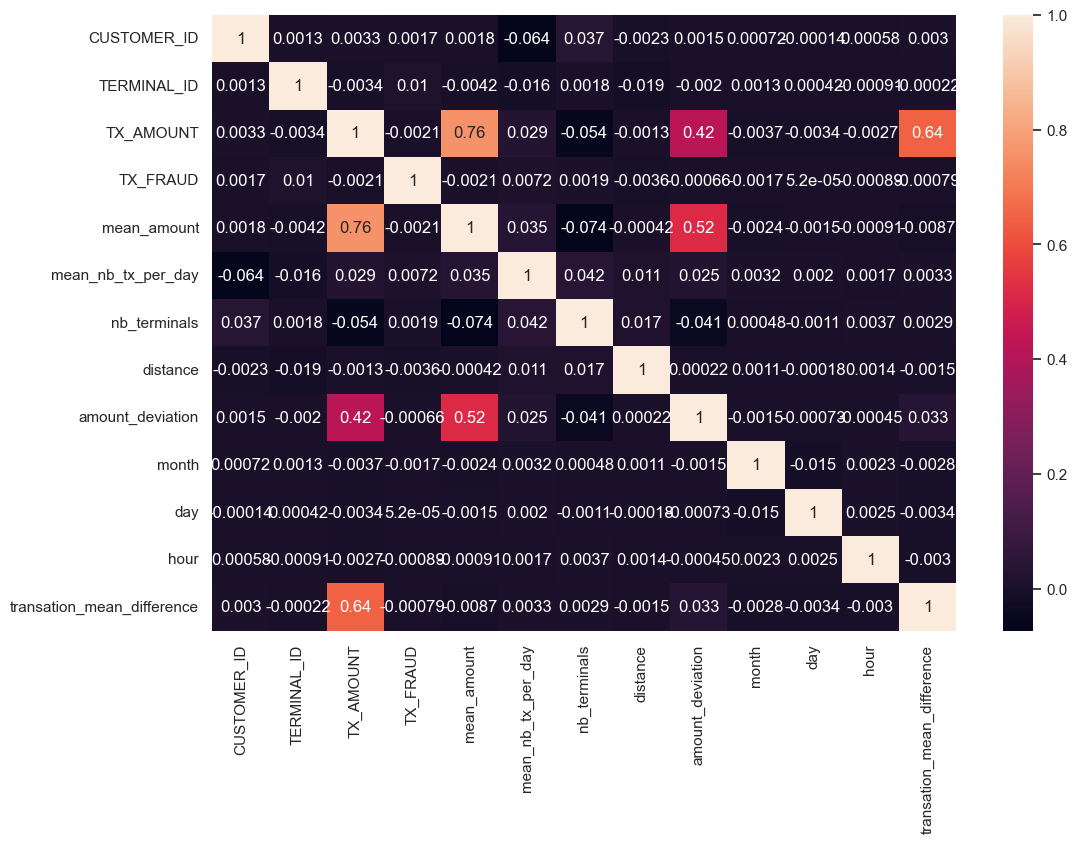

In [55]:
corr = df.corr(numeric_only=True) 

#make the heatmap larger in size
plt.figure(figsize = (12,8))

sns.heatmap(corr, annot=True)
plt.show()

In [384]:
df.head()

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,mean_amount,mean_nb_tx_per_day,nb_terminals,distance,amount_deviation,month,day,hour,transation_mean_difference
0,323,217,4.60,0,7.353061,3.324124,19,4.635184,2.753061,8,1,0,-2.753061
1,6,429,8.61,0,18.618562,3.778676,16,3.345987,10.008562,8,1,0,-10.008562
2,714,1011,64.00,0,82.620413,3.723765,13,3.452222,18.620413,8,1,0,-18.620413
3,266,1969,12.72,0,9.852171,3.862067,15,1.950316,2.867829,8,1,0,2.867829
4,890,1482,98.88,0,83.660035,3.128315,20,4.934747,15.219965,8,1,0,15.219965


## Random forest

In [385]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and TX_FRAUD is the target variable

# Separate features and target
X = df.drop('TX_FRAUD', axis=1)  # Make sure df is your DataFrame variable
y = df['TX_FRAUD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on both the training and testing data
train_predictions = rf_classifier.predict(X_train_scaled)
test_predictions = rf_classifier.predict(X_test_scaled)

# Calculate and print metrics for the training data
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, pos_label=1)
train_f1 = f1_score(y_train, train_predictions, pos_label=1)

print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print(" ")

print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"F1-Score: {train_f1}\n")

# Calculate and print metrics for the testing data
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, pos_label=1)
test_f1 = f1_score(y_test, test_predictions, pos_label=1)

print("Testing Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"F1-Score: {test_f1}\n")




[[54609    10]
 [ 1190    43]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     54619
           1       0.81      0.03      0.07      1233

    accuracy                           0.98     55852
   macro avg       0.89      0.52      0.53     55852
weighted avg       0.97      0.98      0.97     55852

 
Training Metrics:
Accuracy: 0.9999820952977776
Precision: 1.0
F1-Score: 0.9995946493717065

Testing Metrics:
Accuracy: 0.9785146458497458
Precision: 0.8113207547169812
F1-Score: 0.06687402799377916



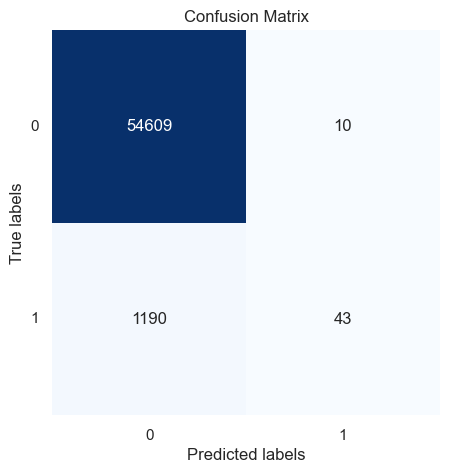

In [387]:
# Generate the confusion matrix again for clarity
cm = confusion_matrix(y_test, test_predictions)

# Plot using Seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(np.unique(y_test))) + .5, np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))) + .5, np.unique(y_test), rotation=0)
plt.show()


## Random forest with SMOTE

In [390]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame and TX_FRAUD is the target variable

# Separate features and target
X = df.drop('TX_FRAUD', axis=1)
y = df['TX_FRAUD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally address class imbalance in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_smote_scaled, y_train_smote)

# Make predictions on the training data
train_predictions = rf_classifier.predict(X_train_smote_scaled)

# Make predictions
predictions = rf_classifier.predict(X_test_scaled)

# Evaluate the model on the training data
print("Training accuracy:", accuracy_score(y_train_smote, train_predictions))
print("Training precision:", precision_score(y_train_smote, train_predictions, pos_label=1))
print("Training F1-score:", f1_score(y_train_smote, train_predictions, pos_label=1))

# Evaluate the model on the test data
print("\nTest Metrics:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Test accuracy:", accuracy_score(y_test, predictions))
print("Test precision:", precision_score(y_test.astype(int), predictions.astype(int), pos_label=1))

Training accuracy: 1.0
Training precision: 1.0
Training F1-score: 1.0

Test Metrics:
[[54050   569]
 [  938   295]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     54619
           1       0.34      0.24      0.28      1233

    accuracy                           0.97     55852
   macro avg       0.66      0.61      0.63     55852
weighted avg       0.97      0.97      0.97     55852

Test accuracy: 0.973017976079639
Test precision: 0.3414351851851852


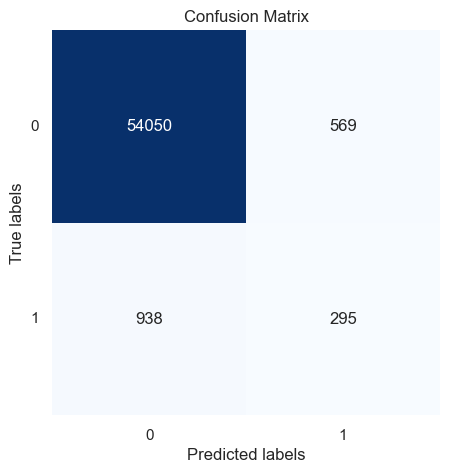

In [392]:
# Generate the confusion matrix again for clarity
cm = confusion_matrix(y_test, predictions)

# Plot using Seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(np.unique(y_test))) + .5, np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))) + .5, np.unique(y_test), rotation=0)
plt.show()


## XGBoost

In [393]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your DataFrame and TX_FRAUD is the target variable

# Separate features and target
X = df.drop('TX_FRAUD', axis=1)  # Assuming 'df' is defined earlier
y = df['TX_FRAUD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_classifier.fit(X_train_scaled, y_train)

# Make predictions on both the training and testing data
train_predictions = xgb_classifier.predict(X_train_scaled)
test_predictions = xgb_classifier.predict(X_test_scaled)

# Evaluate the model on the training data
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, pos_label=1)
train_f1 = f1_score(y_train, train_predictions, pos_label=1)

print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"F1-Score: {train_f1}\n")

# Evaluate the model on the testing data
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, pos_label=1)
test_f1 = f1_score(y_test, test_predictions, pos_label=1)

print("Testing Metrics:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"F1-Score: {test_f1}")


Training Metrics:
Accuracy: 0.9804391128220049
Precision: 0.9492063492063492
F1-Score: 0.21487603305785125

Testing Metrics:
[[54594    25]
 [ 1175    58]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     54619
           1       0.70      0.05      0.09      1233

    accuracy                           0.98     55852
   macro avg       0.84      0.52      0.54     55852
weighted avg       0.97      0.98      0.97     55852

Accuracy: 0.9785146458497458
Precision: 0.6987951807228916
F1-Score: 0.08814589665653495


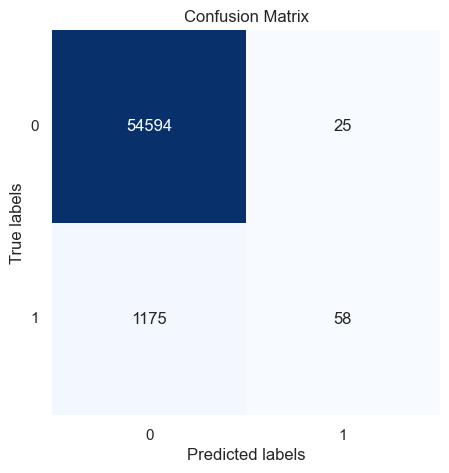

In [394]:
# Generate the confusion matrix again for clarity
cm = confusion_matrix(y_test, test_predictions)

# Plot using Seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(np.unique(y_test))) + .5, np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))) + .5, np.unique(y_test), rotation=0)
plt.show()


## XGBoost with SMOTE

In [396]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming df is your DataFrame and TX_FRAUD is the target variable

# Separate features and target
X = df.drop('TX_FRAUD', axis=1)
y = df['TX_FRAUD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally address class imbalance in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost classifier
# Adjust the scale_pos_weight parameter according to the level of class imbalance
# scale_pos_weight = sum(negative instances) / sum(positive instances)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=(len(y) - sum(y)) / sum(y))

# Train the model
xgb_classifier.fit(X_train_smote_scaled, y_train_smote)

# Make predictions on the training data
train_predictions = xgb_classifier.predict(X_train_smote_scaled)

# Make predictions
predictions = xgb_classifier.predict(X_test_scaled)

# Evaluate the model on the training data
print("Training accuracy:", accuracy_score(y_train_smote, train_predictions))
print("Training precision:", precision_score(y_train_smote, train_predictions, pos_label=1))
print("Training F1-score:", f1_score(y_train_smote, train_predictions, pos_label=1))

# Evaluate the model on the test data
print("\nTest Metrics:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Test accuracy:", accuracy_score(y_test, predictions))
print("Test precision:", precision_score(y_test.astype(int), predictions.astype(int), pos_label=1))


Training accuracy: 0.7318315184305325
Training precision: 0.6509141617601487
Training F1-score: 0.7885257825175923

Test Metrics:
[[24815 29804]
 [  186  1047]]
              precision    recall  f1-score   support

           0       0.99      0.45      0.62     54619
           1       0.03      0.85      0.07      1233

    accuracy                           0.46     55852
   macro avg       0.51      0.65      0.34     55852
weighted avg       0.97      0.46      0.61     55852

Test accuracy: 0.4630451908615627
Test precision: 0.03393731159443778


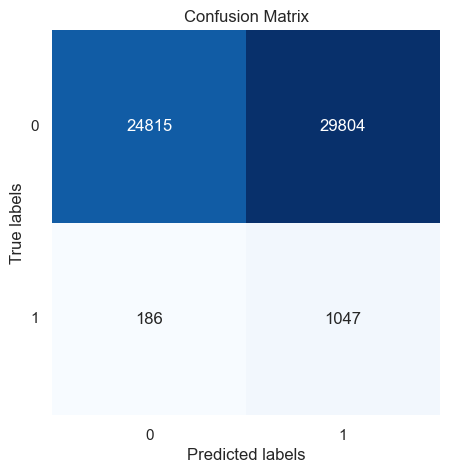

In [397]:
# Generate the confusion matrix again for clarity
cm = confusion_matrix(y_test, predictions)

# Plot using Seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(np.unique(y_test))) + .5, np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))) + .5, np.unique(y_test), rotation=0)
plt.show()

## LDA

Considering that results are not good enough, we implemented LDA to visually observ the separability of the classes

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Assuming X and y are your features and target variable
X = df.drop('TX_FRAUD', axis=1)
y = df['TX_FRAUD']

# Initialize LDA
lda = LDA(n_components=1)  # n_components should be < n_classes - 1

# Fit LDA on the dataset
X_lda = lda.fit_transform(X, y)

# Optionally, use LDA for classification
# lda_classifier = lda.fit(X, y)
# predictions = lda_classifier.predict(X_test)


We find that clasess are not separable, so we are going with another approach

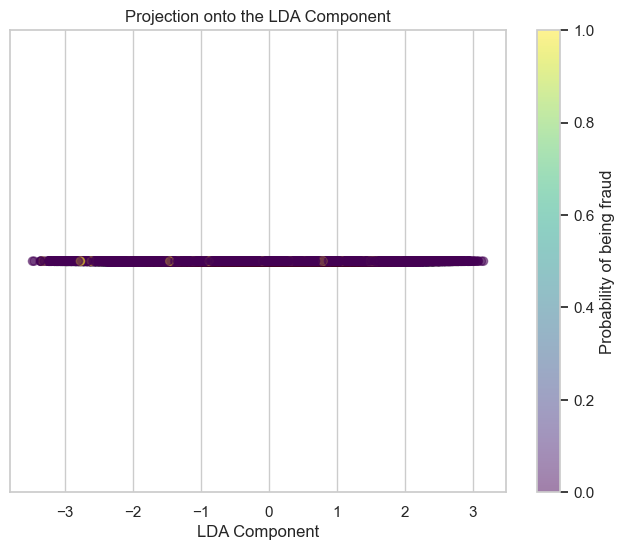

In [70]:
# Plotting the projection of the data onto the LDA component
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda, [0] * len(X_lda), c=y, cmap='viridis',  alpha=0.5)
plt.colorbar(scatter, label='Probability of being fraud')
plt.title('Projection onto the LDA Component')
plt.xlabel('LDA Component')
plt.yticks([])  # Hide y-axis ticks
plt.show()


## PCA

We tried with PCA, in order to reduce the variables conserving most of the variance.

However, due to the lack of correlation between variables we find that 3 principal components only get 35% of the variance, which means to lose most of the information.

In [83]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming `df` is your DataFrame and it contains only numerical features
X = df  # If you have a target variable, ensure to drop it and use only features here

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA - let's reduce the data to 3 principal components as an example
pca = PCA(n_components=3)

# Fit PCA on the standardized data
X_pca = pca.fit_transform(X_scaled)

# Transform the data to its first 3 principal components
print("Original shape: ", X_scaled.shape)
print("Reduced shape: ", X_pca.shape)

# Print the amount of variance explained by each principal component
print(pca.explained_variance_ratio_)

# Sum of explained variance ratio to see total variance captured by the principal components
print("Total variance captured by the first 3 principal components:", sum(pca.explained_variance_ratio_))


Original shape:  (279257, 13)
Reduced shape:  (279257, 3)
[0.17598996 0.09056393 0.08229391]
Total variance captured by the first 3 principal components: 0.3488477936275242
